#### **1. IMPORTING REQUIRED LIBRARIES**

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_transformer 
import seaborn as sns

#### **2. IMPORTING DATASET**

In [35]:
df = pd.read_csv('C:\\Users\\Kamlesh P Panchal\\Documents\\Infosys Internship\\train_og\Train.csv')
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [36]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


In [37]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [38]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (8523, 12)


#### **3. HANDLING MISSING VALUES**

In [39]:
# Check for missing values in the dataset
print(df.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [40]:
df=df.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

In [41]:
# Calculating the mean of 'Item_Visibility' for entries where it is greater than 0
non_zero_mean = df.loc[df['Item_Visibility'] > 0, 'Item_Visibility'].mean()

In [42]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())
df.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [43]:
df['Outlet_Size'].mode()[0]

'Medium'

In [44]:
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [45]:
#Feature Encoding
df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [46]:
# Checking for duplicates and removing them if any
df.drop_duplicates(inplace=True)

In [47]:
print(df.isnull().sum())

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [48]:
# saving the filled dataset
# df.to_csv('processed_train.csv', index=False)

#### **4. UPLOADING THE PROCESSED DATA**

In [49]:
p_df = pd.read_csv("processed_train.csv")
p_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


#### **5. DATA VISUALIZATION**

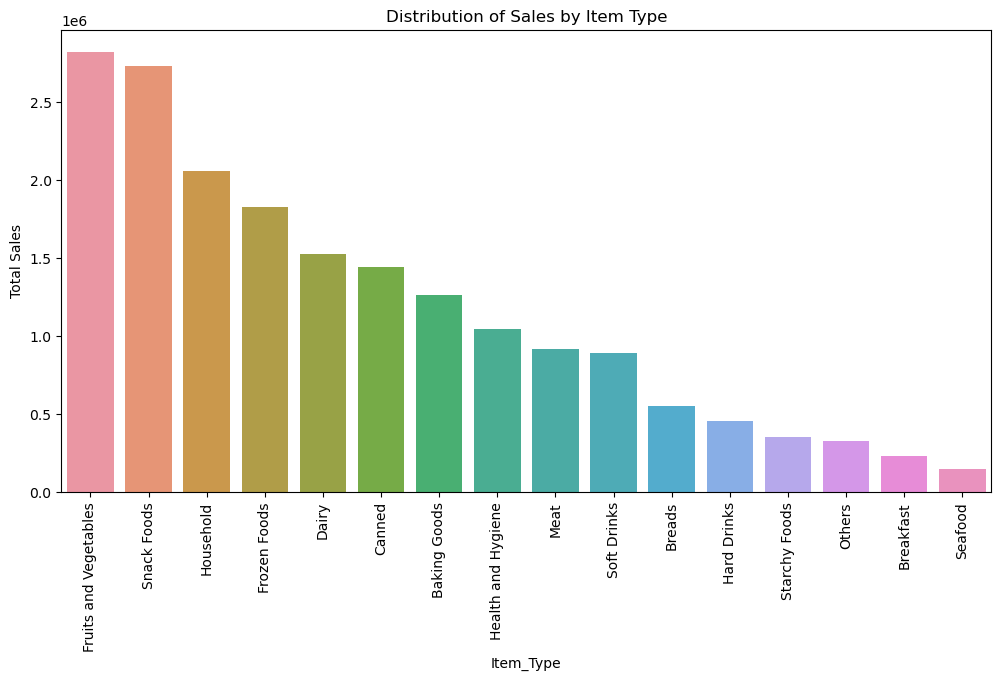

In [50]:
# Bar plot of total sales by Item Type
# Shows total sales for each item type, making it easy to see which items sell the most.

sorted_data = p_df.groupby('Item_Type')['Item_Outlet_Sales'].sum().reset_index().sort_values(by='Item_Outlet_Sales', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=sorted_data, ci=None)
plt.xticks(rotation=90)
plt.title('Distribution of Sales by Item Type')
plt.ylabel('Total Sales')
plt.show()

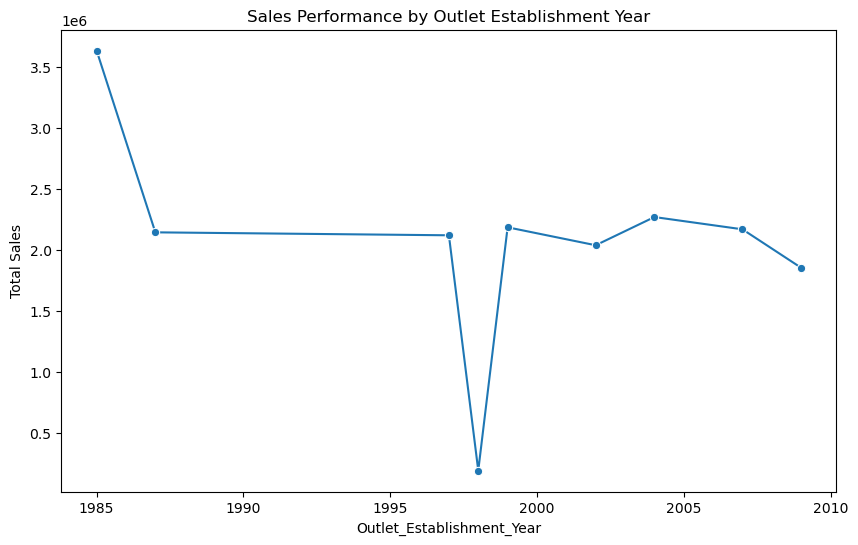

In [51]:
# Line plot for Sales Performance by Outlet Establishment Year
# Tracks total sales over the years to observe if older outlets have higher sales.

p_df_year_sales = p_df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=p_df_year_sales, marker='o')
plt.title('Sales Performance by Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.show()



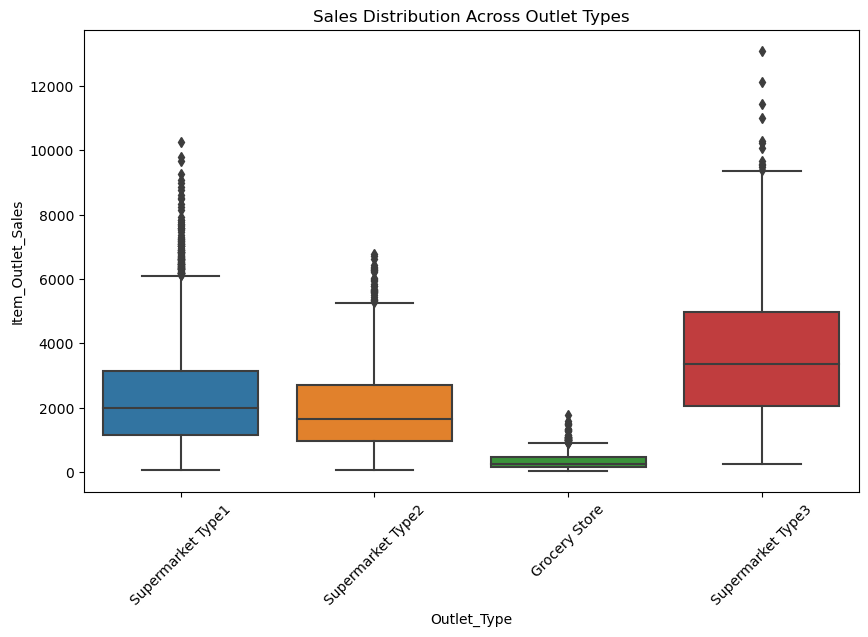

In [52]:
# Box plot of sales across Outlet Types
# Compares sales distribution by outlet type, showing which types generally have higher or lower sales.

plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=p_df)
plt.title('Sales Distribution Across Outlet Types')
plt.xticks(rotation=45)
plt.show()


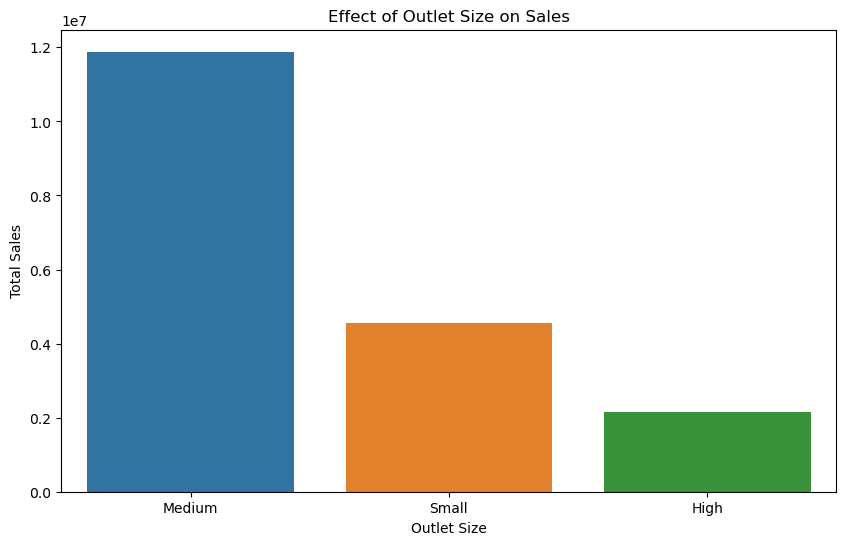

In [53]:
# Bar plot of sales by Outlet Size
# Shows total sales for each outlet size, helping to see if bigger outlets perform better.

sorted_data = p_df.groupby('Outlet_Size')['Item_Outlet_Sales'].sum().reset_index().sort_values(by='Item_Outlet_Sales', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=sorted_data, ci=None)
plt.title('Effect of Outlet Size on Sales')
plt.ylabel('Total Sales')
plt.xlabel('Outlet Size')
plt.show()

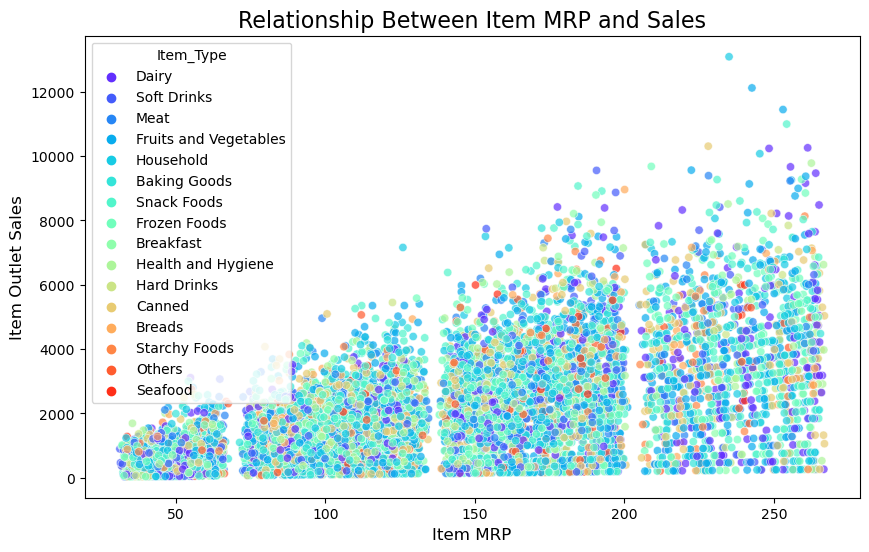

In [54]:
# Relationship Between Item MRP and Sales (Scatter Plot)
# Displays how item price (MRP) affects sales, with colors representing different item types.

plt.figure(figsize=(10,6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=p_df, hue='Item_Type', palette="rainbow", alpha=0.7)
plt.title('Relationship Between Item MRP and Sales', fontsize=16)
plt.xlabel('Item MRP', fontsize=12)
plt.ylabel('Item Outlet Sales', fontsize=12)
plt.show()

ADDITIONAL VISUALIZATIONS

<Figure size 1500x1000 with 0 Axes>

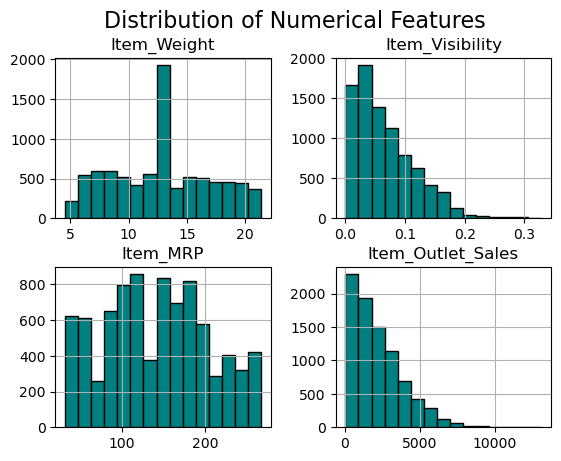

In [55]:
# Distribution of numerical features
# Histograms for each numerical feature to see their distribution, like average or spread of values.

# defining numerical values
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

plt.figure(figsize=(15, 10))
df[numerical_columns].hist(bins=15, color='teal', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()


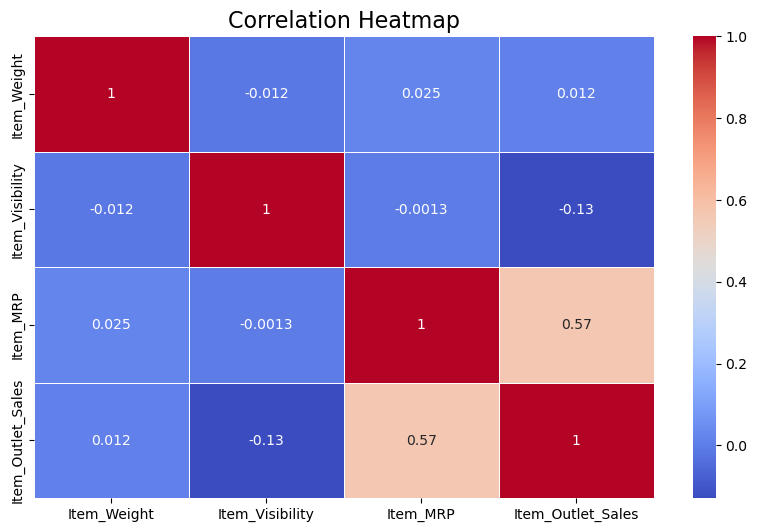

In [56]:
# Correlation Heatmap
# Shows correlations among numerical features, highlighting strong positive or negative relationships.

plt.figure(figsize=(10, 6))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

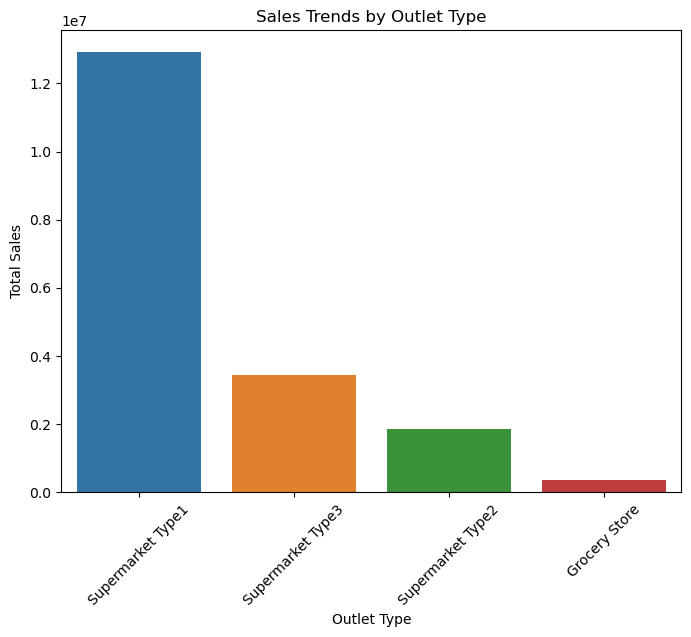

In [57]:
# Bar plot of sales by Outlet Type
# Shows total sales by outlet type, helping to identify which types have the highest sales.

p_df_outlet_sales = p_df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().reset_index()
p_df_outlet_sales = p_df_outlet_sales.sort_values(by='Item_Outlet_Sales', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=p_df_outlet_sales)
plt.title('Sales Trends by Outlet Type')
plt.ylabel('Total Sales')
plt.xlabel('Outlet Type')
plt.xticks(rotation=45)
plt.show()

#### **6. UNIVARIATE ANALYSIS**

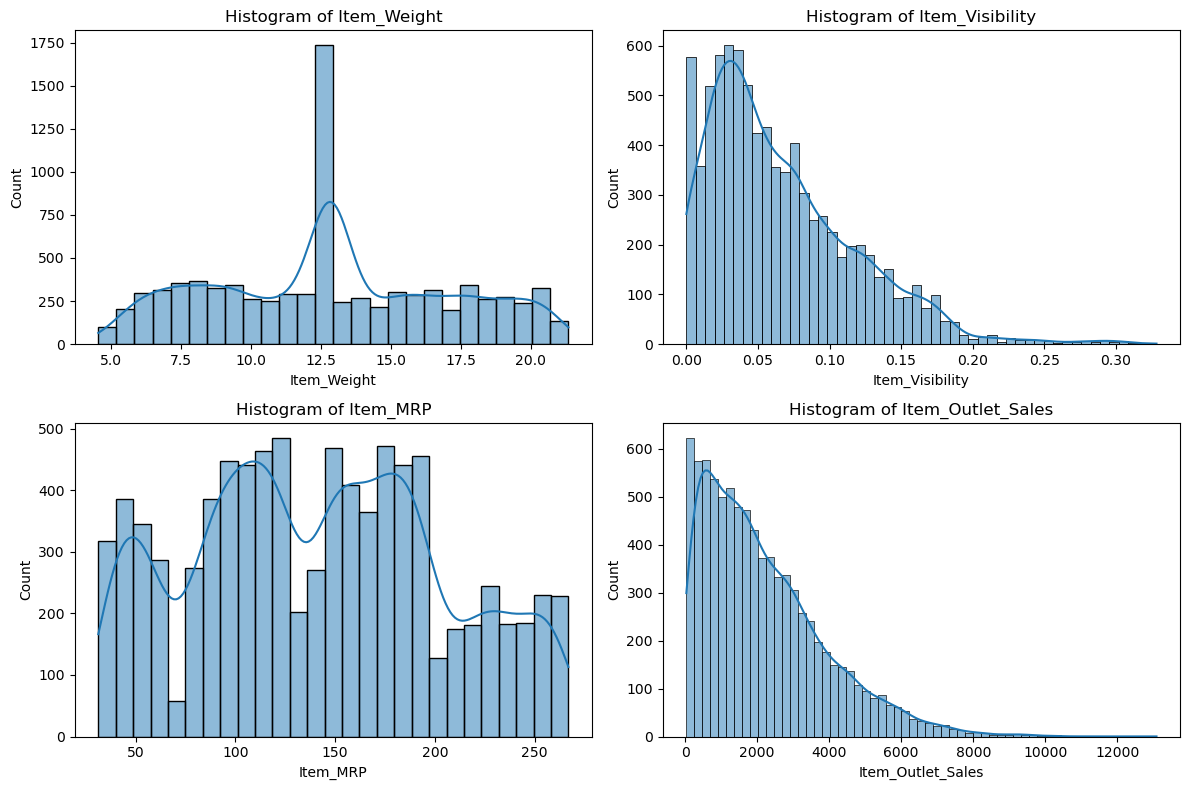

In [58]:
# Histograms of numerical features
# Shows distribution of each numerical feature to identify common or outlying values.

numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(2, 2, numerical_features.index(feature) + 1)
    sns.histplot(p_df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()


#### **8. CATEGORICAL ANALYSIS**

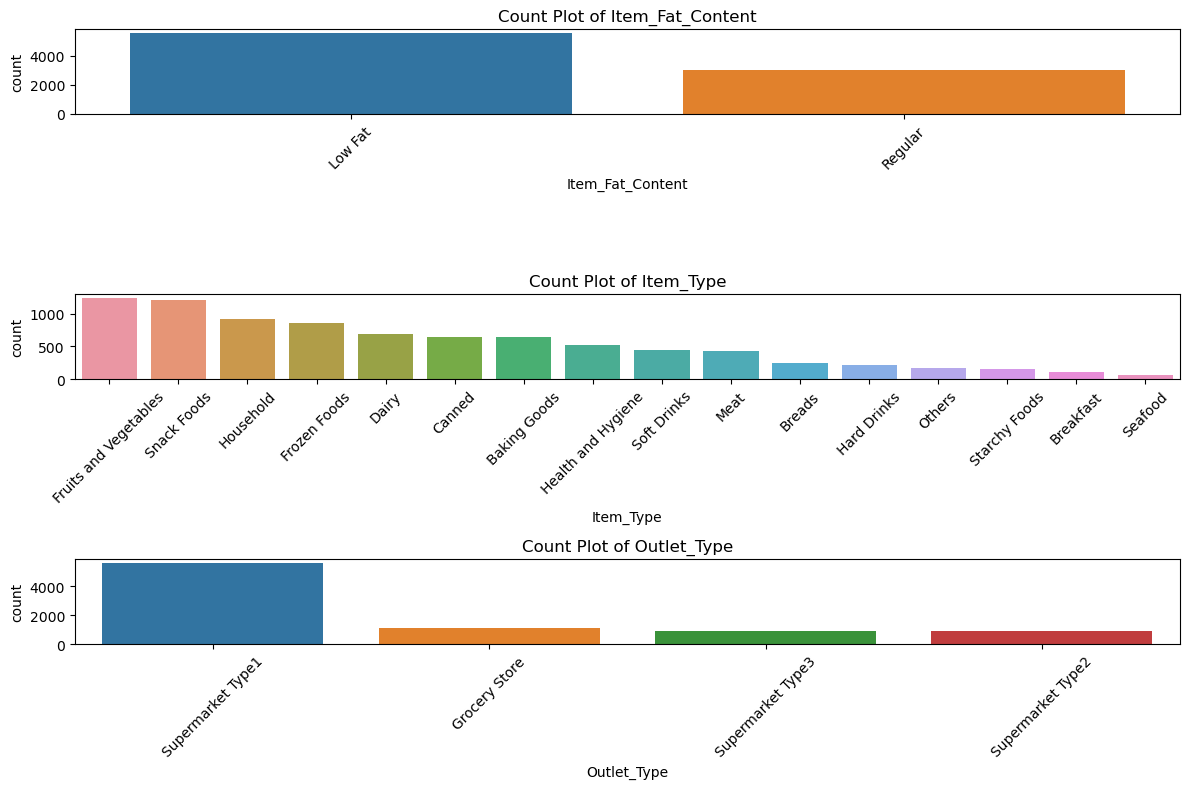

In [59]:
# Count plot of each categorical feature
# Visualizes counts for each category in selected features to understand feature popularity or balance.

categorical_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Type']

plt.figure(figsize=(12, 8))  

# Loop through each categorical feature to create sorted count plots
for idx, feature in enumerate(categorical_features):
    # Creating a subplot for each feature (3 rows, 1 column for vertical stacking)
    plt.subplot(3, 1, idx + 1)
    
    # Sorting the feature values by count in descending order
    sorted_counts = p_df[feature].value_counts().sort_values(ascending=False).index
    
    # Generating count plot for the current feature with sorted values
    sns.countplot(x=p_df[feature], order=sorted_counts)
    plt.title(f'Count Plot of {feature}') 
    plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()

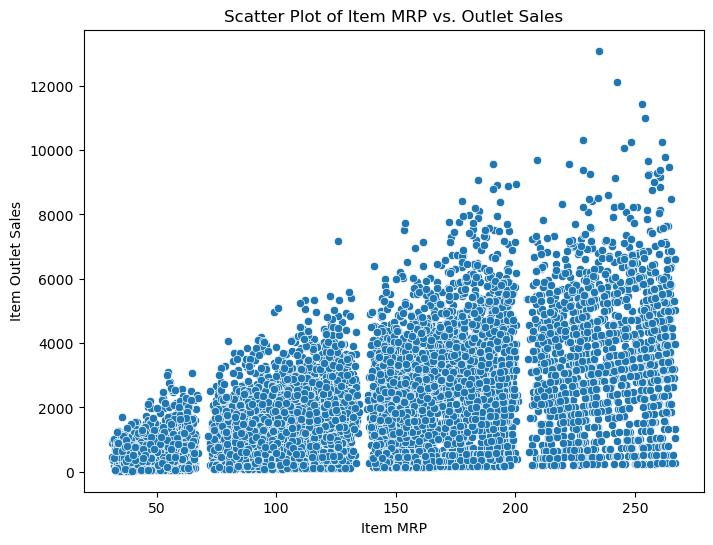

In [60]:
# Scatter plot of Item MRP vs. Outlet Sales
# Shows relationship between item price (MRP) and outlet sales, indicating pricing impact on sales.

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=p_df)
plt.title('Scatter Plot of Item MRP vs. Outlet Sales')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.show()


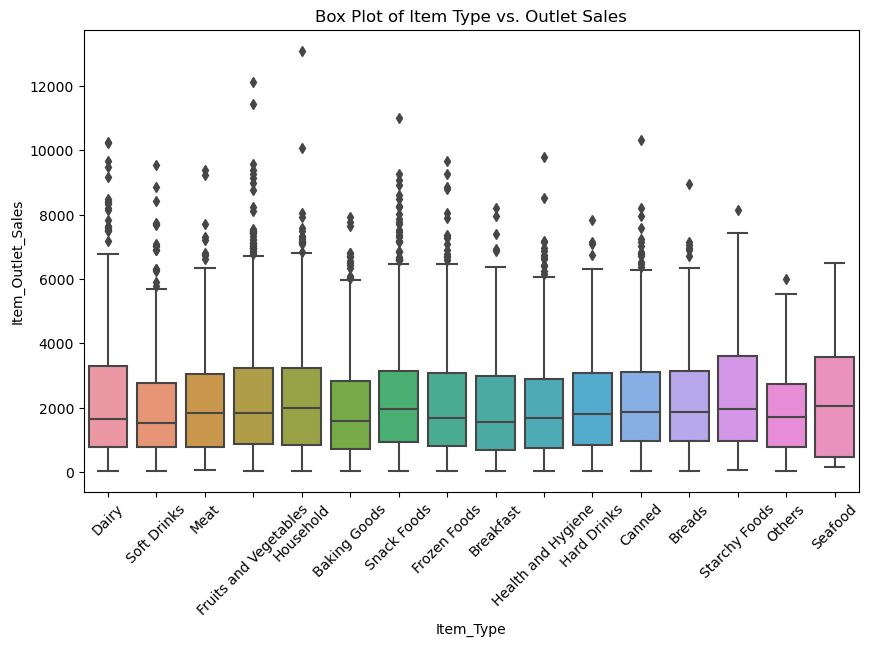

In [61]:
# Box plot of Item Type vs. Outlet Sales
# Compares sales for each item type, showing spread and identifying top-performing item types.

plt.figure(figsize=(10, 6))
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=p_df)
plt.title('Box Plot of Item Type vs. Outlet Sales')
plt.xticks(rotation=45)
plt.show()


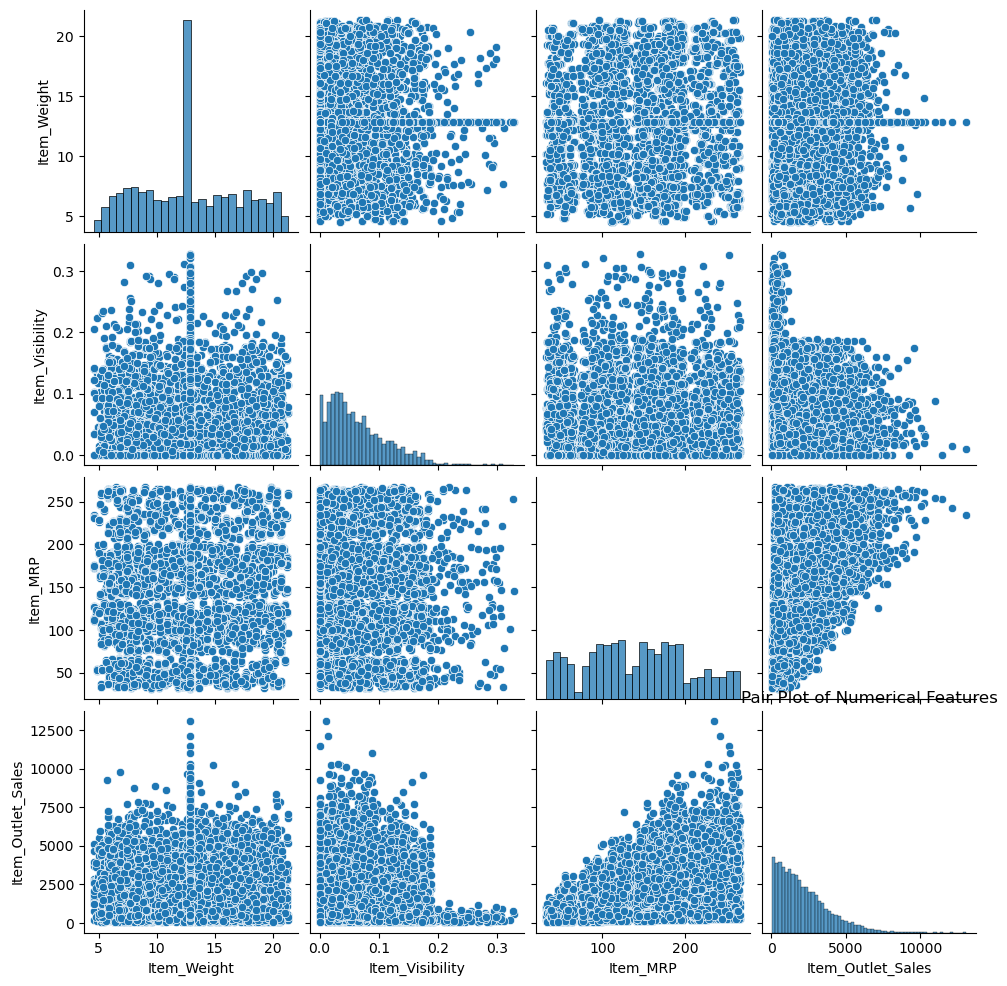

In [62]:
# Pair plot for numerical features
# Shows pairwise relationships for numerical features, useful for spotting trends or correlations.

sns.pairplot(p_df[numerical_features])
plt.title('Pair Plot of Numerical Features')
plt.show()
